Tiana Randriamaro <br>
Alex Kappes
Econs 514

# The data

The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. It is separated into two groups as train and test and also separated into the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Dataset shape

In [2]:
x_train.shape

(60000, 28, 28)

## Visualizing the data with matplotlib

1


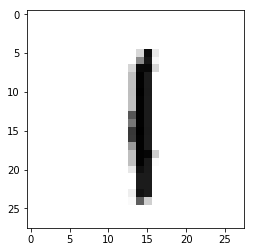

In [4]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 14000 # Ranges from 0 to 60,000
print(y_train[image_index]) # The label is 1
plt.imshow(x_train[image_index], cmap='Greys')

## Reshaping and normalization

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# The values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Building the neural network

In [6]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) # 10 neurons for 10 number classes (0,1,..9)

Using TensorFlow backend.


In [7]:
# Compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.2036 - acc: 0.9386
Epoch 2/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0826 - acc: 0.9746
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0564 - acc: 0.9825
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0438 - acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0350 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0292 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0239 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0222 - acc: 0.9922
Epoch 9/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0206 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0182 - a

## Evaluating the model

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 553us/step


[0.06720509715685112, 0.9824]

### The model achieves 98.24% accuracy.

9


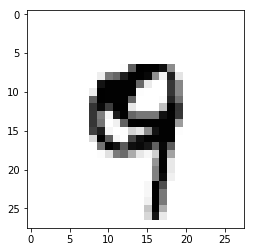

In [13]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

### The model succesfully qualifies the image above as 9.

# Regression Classfication Tree

The code below develops a classification regression tree using root mean squared error as the cost function. Prediction values are printed as final output. Data used for classification is generated and has no real meaning.

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats

###
import warnings
warnings.filterwarnings('ignore')
###

#### Classification Tree ####

# generate random data instead of loading from /home/ajkappes directory #
def vars(j, var):
    vars = []
    l = 1
    for i in range(j):
        vars.append(var + str(l))
        l += 1
    return vars

def generate_data(n, indicate, test_split):
    alpha = 0.75
    X = vars(2, 'x')
    df = pd.DataFrame({X[0]: stats.norm.rvs(loc=5, scale=0.75, size=n),
                       X[1]: stats.norm.rvs(loc=2, scale=0.25, size=n)})
    df['y'] = alpha * df[X[0]] + (1 - alpha) * df[X[1]]
    df['y_bin'] = np.where(df['y'] > df['y'].mean(), 1, 0)

    train_idx = list(np.random.choice(df.index.tolist(), size=int((1 - test_split) * len(df)), replace=False))
    if indicate == 'train':
        return df.loc[train_idx]

    else:
        return df.loc[[idx for idx in df.index if idx not in train_idx]]

df_train = generate_data(100,'train', 0.2)
X_train = df_train[['x1', 'x2']]
y_train = df_train['y']

df_test = generate_data(100, 'test', 0.2)
X_test = df_test[['x1', 'x2']]
y_test = df_test['y']

class node:
    def __init__(self, x, y, idx, min_leaf_sample):
        self.x = x
        self.y = y
        self.idx = idx
        self.min_leaf_sample = min_leaf_sample
        self.cost_init = np.inf

    def generate_split(self, x_j):
        x = self.x.values[idx, x_j]

        for i in range(x.shape[0]):
            split_left = x[x <= x[i]]
            split_right = x[x > x[i]]

            if len(split_left) < self.min_leaf_sample or len(split_right) < self.min_leaf_sample:
                continue

            cost = self.get_cost(left, right)
            if cost < self.cost_init:
                self.cost_init = cost
                self.x_j = x_j
                self.split = x[i]

    def get_cost(self, left, right):
        left_std = self.y[self.idx][left]
        right_std = self.y[self.idx][right]
        return left_std * len(split_left) + right_std * len(split_right)

    def generate_var_split(self):
        for j in range(self.x.shape[1]):
            if self.leaf == True:
                return
            x = self.split_var
            left = np.nonzero(x <= self.split)[0]
            right = np.nonzero(x > self.split)[0]
            self.left = node(self.x, self.y, self.idx[left], self.min_leaf_sample)
            self.right = node(self.x, self.y, self.idx[right], self.min_leaf_sample)

    @property
    def split_var(self):
        return self.x.values[self.idx, self.x_j]

    @property
    def leaf(self):
        return self.cost_init == float(np.inf)

    def predict_idx(self, x_i):
        if self.leaf == True:
            return np.mean(self.y[self.idx])

        if x_i[self.x_j] <= self.split:
            d_node = self.left
        else:
            d_node = self.right

        return d_node.predict_idx(x_i)

    def prediction(self, x):
        return np.array([self.predict_idx(x_i) for x_i in x])

class decision_tree:

    def fit(self, x, y, min_leaf_sample):
        self.decisiontree = node(x, y, np.arange(len(y)), min_leaf_sample)
        return self

    def prediction(self, x):
        return self.decisiontree.prediction(x.values)


d_test_tree = decision_tree().fit(X_test, y_test, min_leaf_sample=10)
d_test_tree_predict = d_test_tree.prediction(X_test)

print('Prediction values for test data are:', '\n \n', d_test_tree_predict)

Prediction values for test data are: 
 
 [4.17440313 4.17440313 4.17440313 4.17440313 4.17440313 4.17440313
 4.17440313 4.17440313 4.17440313 4.17440313 4.17440313 4.17440313
 4.17440313 4.17440313 4.17440313 4.17440313 4.17440313 4.17440313
 4.17440313 4.17440313]


Prediction values correspond to mean leaf values at terminal nodes. They appear to be uniform across the test data set due to data generation following a small interval. 

In [10]:
print(df_test['y'].mean())

4.07300949265772


In [11]:
df_test

,x1,x2,y,y_bin
0,4.500512,1.726770,3.807077,0
10,4.448824,1.866298,3.803192,0
11,5.208152,2.346360,4.492704,1
16,6.170585,2.228855,5.185152,1
19,4.105588,2.018800,3.583891,0
20,5.092602,1.968971,4.311695,1
26,5.053766,2.430680,4.397995,1
33,6.329394,1.886616,5.218700,1
34,3.796074,1.601571,3.247448,0
35,3.290993,2.275941,3.037230,0
